In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '../utils')
from dataPiping import *

import numpy as np
import pandas as pd
import math
import datetime
from sklearn.ensemble import RandomForestRegressor

In [2]:
import tensorflow as tf

In [3]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from math import exp, fabs, sqrt, log, pi
import random

In [4]:
rnd=57
random.seed(rnd)

In [5]:
X, y = readAggrData()
del X['recency']
X_train, X_test, y_train, y_test = splitAndNormaliseAggr(X,y)

In [6]:
def pltBars(values, labels):
    fig = plt.figure(figsize=(20,5))
    plt.bar(range(len(values)), values)
    plt.xticks(range(len(values)), labels)

## Random Forest Regression

In [7]:
model = RandomForestRegressor()

In [49]:
param_grid = {
    'max_features': [6,7,8,9,10,11,12,13],
    'n_estimators': [10,20,50],
    'max_depth': [5,6,7,8],
    'min_samples_leaf': range(1,20)
}

In [50]:
# grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, verbose=2, n_jobs=10)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', verbose=1, n_jobs=10)

In [51]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 1824 candidates, totalling 5472 fits


[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    2.8s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:   16.4s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:   40.9s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:  1.4min
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:  2.4min
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:  3.5min
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:  5.1min
[Parallel(n_jobs=10)]: Done 3180 tasks      | elapsed:  6.9min
[Parallel(n_jobs=10)]: Done 4030 tasks      | elapsed:  9.3min
[Parallel(n_jobs=10)]: Done 4980 tasks      | elapsed: 11.8min
[Parallel(n_jobs=10)]: Done 5472 out of 5472 | elapsed: 13.6min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=10,
       param_grid={'max_depth': [5, 6, 7, 8], 'min_samples_leaf': range(1, 20), 'n_estimators': [10, 20, 50], 'max_features': [6, 7, 8, 9, 10, 11, 12, 13]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=1)

In [52]:
grid.best_params_

{'max_depth': 6,
 'max_features': 10,
 'min_samples_leaf': 18,
 'n_estimators': 50}

In [8]:
# rf = RandomForestRegressor(**grid.best_params_)
rf = RandomForestRegressor(max_depth=6,max_features=10,min_samples_leaf=18,n_estimators=50)

In [9]:
rf.fit(X_train, y_train) 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features=10, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=18, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

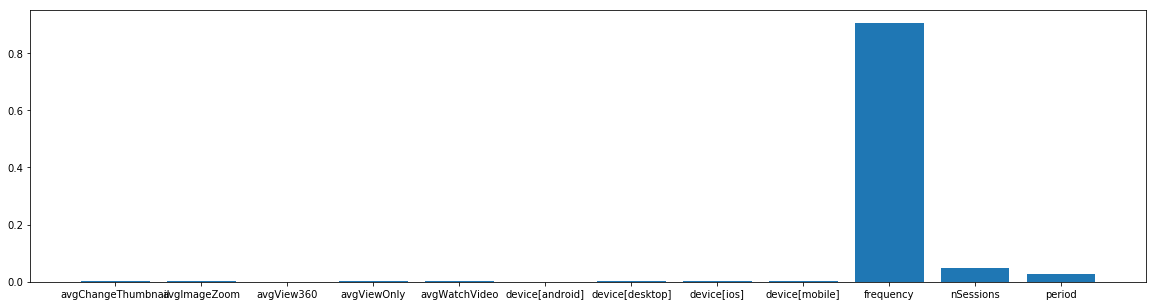

In [10]:
pltBars(rf.feature_importances_, X.columns)

In [11]:
rmse = sqrt(mean_squared_error(y_test, rf.predict(X_test)))
str(datetime.timedelta(seconds=rmse))

'155 days, 16:33:21.292792'

In [12]:
rmse

13451601.292792048

## Prediction variance

(array([ 6533.,  3183.,  1995.,   843.,   772.,   495.,   380.,   342.,
          372.,   119.]),
 array([   468706.02228416,   4209798.14190515,   7950890.26152614,
         11691982.38114713,  15433074.50076812,  19174166.62038911,
         22915258.74001011,  26656350.8596311 ,  30397442.97925209,
         34138535.09887308,  37879627.21849407]),
 <a list of 10 Patch objects>)

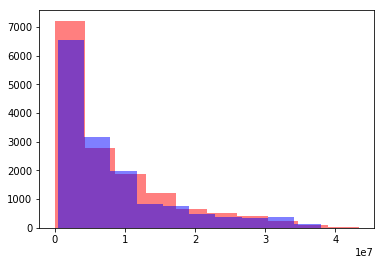

In [59]:
y_pred = rf.predict(X_test)
plt.hist(y_test, alpha=0.5, color='r')
plt.hist(y_pred, alpha=.5, color='b')

(array([   46.,   208.,   562.,   905.,  1328.,  2707.,  5556.,  2642.,
          864.,   216.]),
 array([-11638299.95615275,  -9653583.03109493,  -7668866.10603711,
         -5684149.18097928,  -3699432.25592146,  -1714715.33086364,
           270001.59419418,   2254718.51925201,   4239435.44430983,
          6224152.36936765,   8208869.29442548]),
 <a list of 10 Patch objects>)

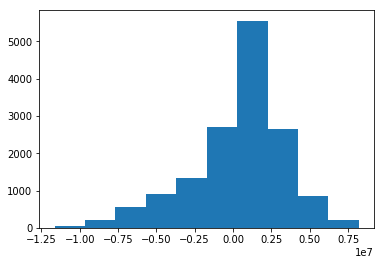

In [60]:
plt.hist(y_pred - y_test)